<a href="https://colab.research.google.com/github/MichelWakim/mnist-model/blob/main/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the dataset

In [20]:
from keras.datasets import mnist

Dividing the dataset to training and testing 

In [21]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# **Plotting some dataset**

<function matplotlib.pyplot.show(close=None, block=None)>

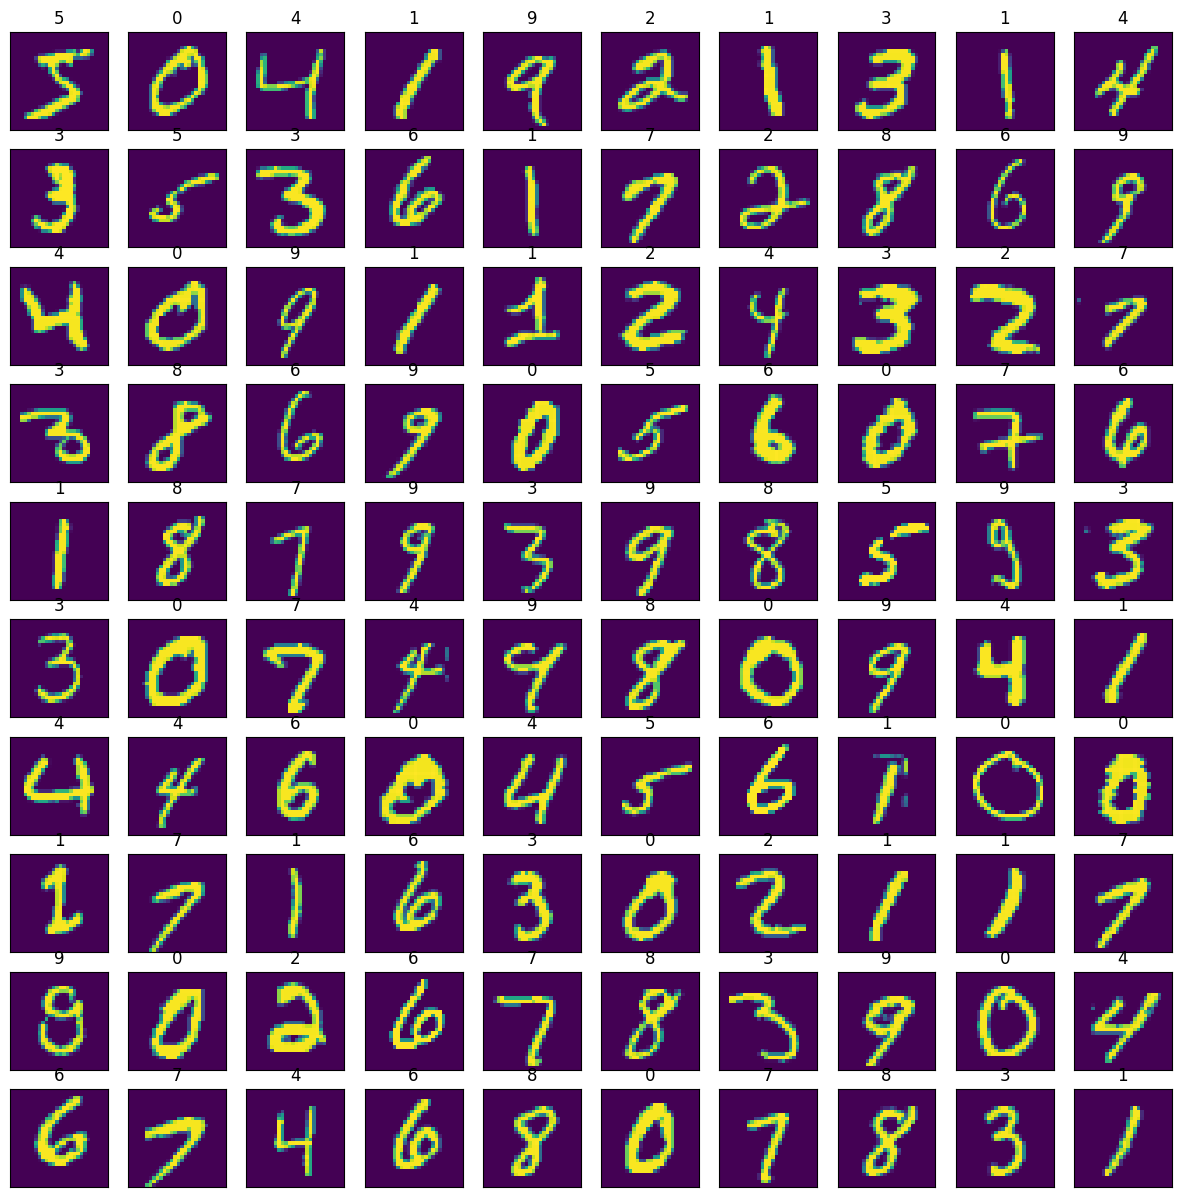

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(100) : 
  plt.subplot(10,10,i+1)       #one row with 2 columns
  plt.xticks([])    #to remove the x axis
  plt.yticks([])     #to remove the y axis
  plt.title(y_train[i])   #to make a title
  plt.imshow(x_train[i])
plt.show

In [24]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


# **encoding the labels**

In [25]:
from keras.utils import to_categorical  #encoding the categories of labels
y_train_c = to_categorical(y_train) 
y_test_c = to_categorical(y_test)

# **Scalling the dataset**

In [26]:
x_train_n =( x_train / 255)[:,:,:,None]    #normalizing the data "scalling"
x_test_n = (x_test / 255)[:,:,:,None]       #scalling the tested dataset
print(x_train_n[0,16])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.0627451 ]
 [0.36470588]
 [0.98823529]
 [0.99215686]
 [0.73333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


# **Building the CNN**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

*Adding layers*

In [28]:
cnn = Sequential()
cnn.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', strides=1 ,activation ='relu', input_shape=(28,28,1))) #strides= 1 means the x and y are the same
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', strides=1,activation='relu')) #strides= 1 means the x and y are the same
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=32, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

*Printing the model details and number of params*

In [29]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [30]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

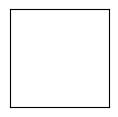

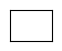

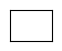

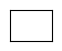

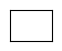

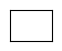

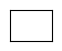

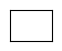

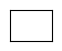

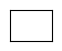

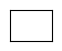

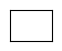

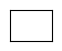

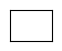

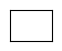

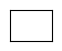

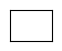

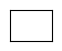

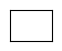

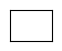

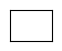

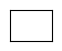

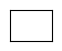

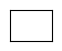

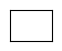

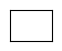

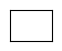

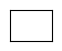

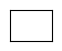

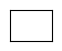

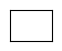

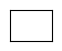

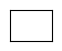

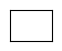

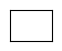

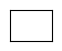

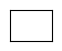

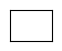

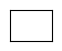

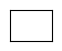

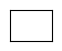

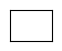

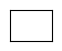

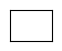

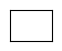

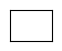

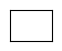

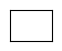

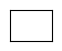

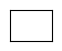

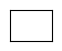

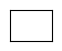

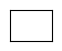

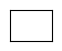

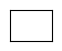

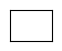

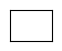

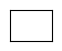

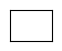

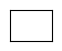

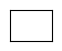

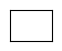

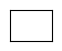

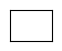

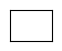

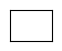

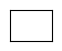

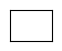

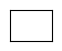

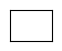

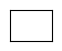

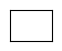

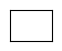

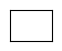

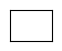

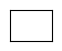

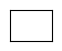

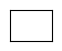

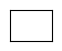

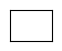

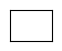

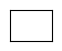

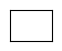

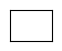

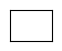

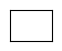

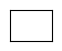

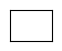

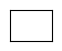

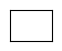

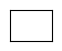

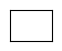

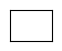

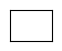

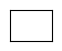

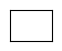

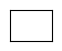

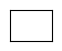

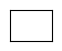

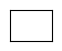

<function matplotlib.pyplot.show(close=None, block=None)>

In [31]:
plt.figure(figsize=(15,15))
for i in range(100) : 
  plt.subplot(10,10,i+1)       #one row with 2 columns
  plt.xticks([])    #to remove the x axis
  plt.yticks([])     #to remove the y axis
  plt.show(Conv2D)
plt.show

*Training the model*

In [32]:
h=cnn.fit(x_train_n,y_train_c,epochs=10,batch_size=32,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1967 - accuracy: 0.9409
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0470 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0375 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0141 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

*Saving the model and the params values*

In [33]:
cnn.save('mnist_model.h5')

*Using the test dataset and check accuracy*

In [34]:
score = cnn.evaluate(x_test_n, y_test_c)
print('Test Accuracy = {: .2f}%'.format(score[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9860
Test Accuracy =  98.60%
